# Section 1.3 | Mathematical Properties and Manipulations | Geometric Interpretation
## Source: Code adapted from

1. DynamicsLab. “CH01_SEC03_Rotation.ipynb.” GitHub repository, https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC03_Rotation.ipynb (accessed 2025-4-26).

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

theta = np.array([np.pi/15, -np.pi/9, np.pi/20])

Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
                [0, np.cos(theta[0]), -np.sin(theta[0])],
                [0, np.sin(theta[0]), np.cos(theta[0])]])
# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
                [0, 1, 0],
                [-np.sin(theta[1]), 0, np.cos(theta[1])]])
# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
                [np.sin(theta[2]), np.cos(theta[2]), 0],
                [0, 0, 1]])

#Rotate then scale
X = Rz @ Ry @ Rx @ Sigma

(-2.5, 2.5)

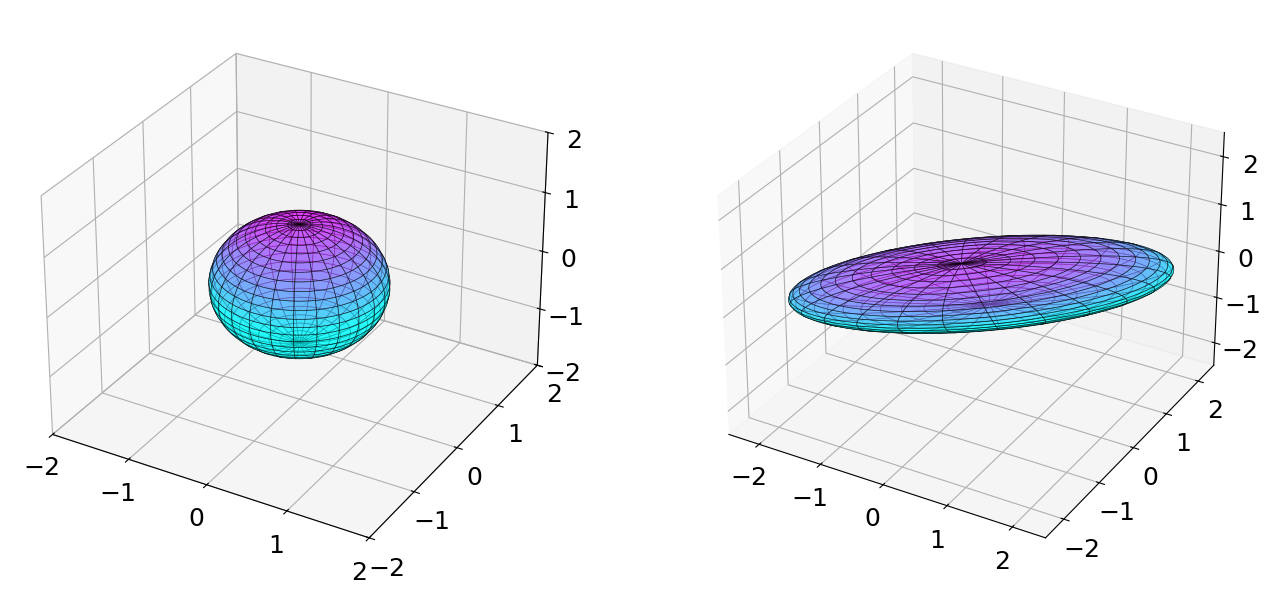

In [11]:
# Plot sphere
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

# First plot
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

surf1 = ax1.plot_surface(x, y, z, cmap='cool', alpha=0.6, facecolors=plt.cm.cool(z), linewidth=0.5, rcount=30, ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

surf2 = ax2.plot_surface(xR, yR, zR, cmap='cool', alpha=0.6,linewidth=0.5, facecolors=plt.cm.cool(z), rcount=30, ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2.5, 2.5)
ax2.set_ylim3d(-2.5, 2.5)
ax2.set_zlim3d(-2.5, 2.5)
